Dogecoin-Price Prediction using ml:

Dogecoin unlike cryptocurrencies like bitcoin and ethereum was built just because of a meme.

We will make a model to predict the price of the crypto currency.

In [55]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor

In [56]:
# now let's load the dataset for training.
df = pd.read_csv('/home/aaranyak/Documents/ml_projects/ml_projects/Dogecoin Price Prediction/DOGE-USD.csv')
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2017-11-09,0.001207,0.001415,0.001181,0.001415,0.001415,6259550.0
1,2017-11-10,0.001421,0.001431,0.001125,0.001163,0.001163,4246520.0
2,2017-11-11,0.001146,0.001257,0.001141,0.001201,0.001201,2231080.0
3,2017-11-12,0.001189,0.001210,0.001002,0.001038,0.001038,3288960.0
4,2017-11-13,0.001046,0.001212,0.001019,0.001211,0.001211,2481270.0


Note: The corr() method ignores "not numeric" columns.

In [57]:
# now let's check the correlation
df.shape
df1 = df.iloc[:,1:]  # i dropped the first column as we can't find the correlation by including first column as it is of string type.

In [58]:
df.shape

(1761, 7)

In [59]:
df1.shape

(1761, 6)

In [60]:
df1.corr()

,Open,High,Low,Close,Adj Close,Volume
Open,1.000000,0.993904,0.993707,0.992514,0.992514,0.554850
High,0.993904,1.000000,0.986497,0.995104,0.995104,0.619321
Low,0.993707,0.986497,1.000000,0.994575,0.994575,0.519991
Close,0.992514,0.995104,0.994575,1.000000,1.000000,0.588678
Adj Close,0.992514,0.995104,0.994575,1.000000,1.000000,0.588678
Volume,0.554850,0.619321,0.519991,0.588678,0.588678,1.000000


Now I have to convert the string data and time to proper date and time format using pandas.

In [61]:
df.shape

(1761, 7)

In [62]:
df['Date'] = pd.to_datetime(df['Date'],infer_datetime_format=True)
df.set_index('Date',inplace=True)

/tmp/ipykernel_4707/1941536347.py:1: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df['Date'] = pd.to_datetime(df['Date'],infer_datetime_format=True)


In [63]:
df.columns

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [64]:
df.shape

(1761, 6)

to check for null values

In [65]:
df.isnull().any()

Open         True
High         True
Low          True
Close        True
Adj Close    True
Volume       True
dtype: bool

In [66]:
df.isnull().sum()

Open         1
High         1
Low          1
Close        1
Adj Close    1
Volume       1
dtype: int64

Now we have to drop those missing values which can affect the model training.

In [67]:
df = df.dropna()

In [68]:
# now we can check the statistical analysis of the data.
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1760.000000,1760.000000,1760.000000,1760.000000,1760.000000,1.760000e+03
mean,0.059575,0.063096,0.056126,0.059619,0.059619,1.016258e+09
std,0.101325,0.109152,0.093695,0.101379,0.101379,3.563999e+09
min,0.001046,0.001210,0.001002,0.001038,0.001038,1.431720e+06
25%,0.002550,0.002616,0.002500,0.002548,0.002548,2.307671e+07
50%,0.003476,0.003603,0.003356,0.003495,0.003495,8.981855e+07
75%,0.070633,0.075035,0.068478,0.070657,0.070657,6.565853e+08
max,0.687801,0.737567,0.608168,0.684777,0.684777,6.941068e+10


In [69]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Open,1760.0,5.957455e-02,1.013254e-01,1.046000e-03,2.549500e-03,3.476500e-03,7.063300e-02,6.878010e-01
High,1760.0,6.309565e-02,1.091517e-01,1.210000e-03,2.616000e-03,3.603500e-03,7.503525e-02,7.375670e-01
Low,1760.0,5.612606e-02,9.369549e-02,1.002000e-03,2.499750e-03,3.356000e-03,6.847775e-02,6.081680e-01
Close,1760.0,5.961943e-02,1.013787e-01,1.038000e-03,2.547750e-03,3.494500e-03,7.065750e-02,6.847770e-01
Adj Close,1760.0,5.961943e-02,1.013787e-01,1.038000e-03,2.547750e-03,3.494500e-03,7.065750e-02,6.847770e-01
Volume,1760.0,1.016258e+09,3.563999e+09,1.431720e+06,2.307671e+07,8.981855e+07,6.565853e+08,6.941068e+10


Now we need to know about the closing price as it is important to find out the prediction.

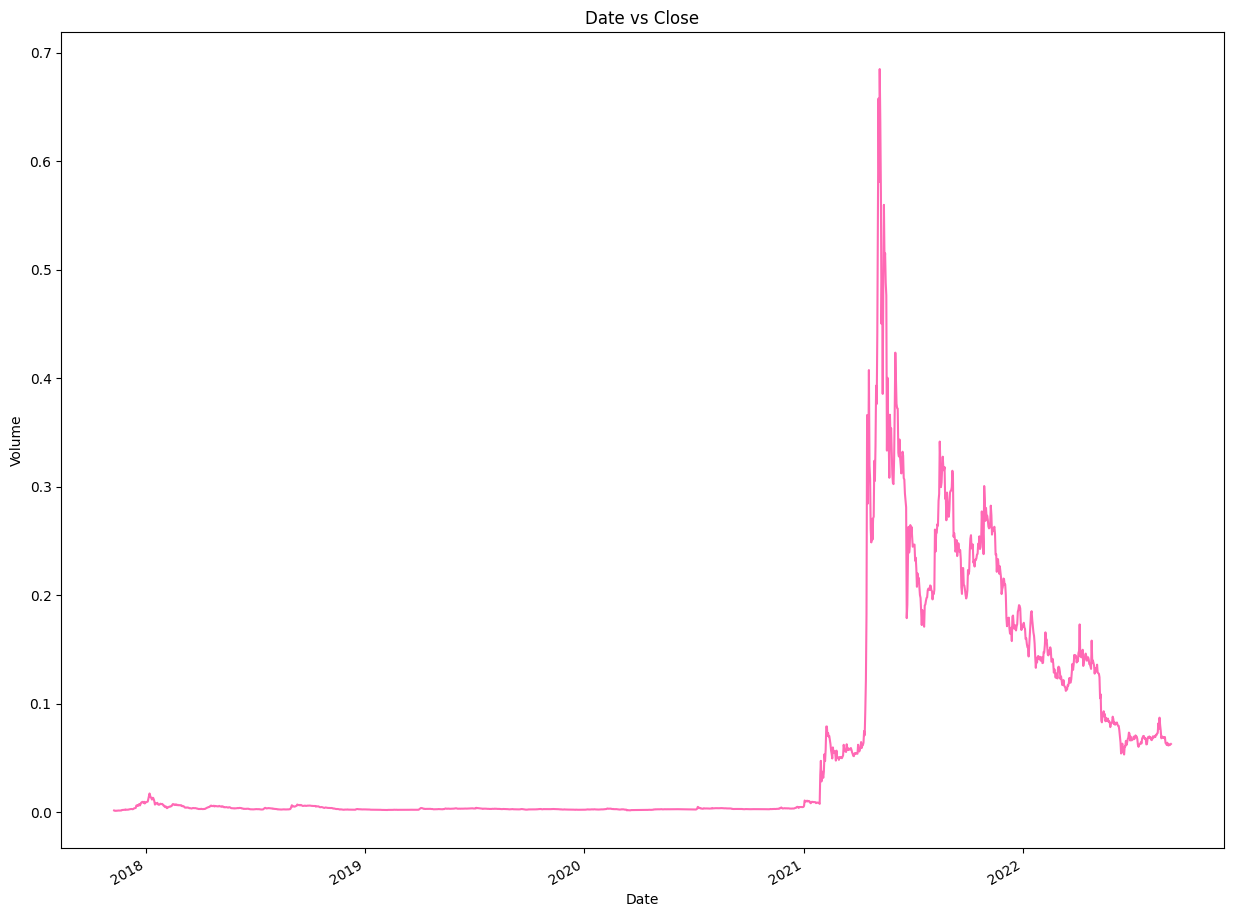

In [70]:
plt.figure(figsize=(15,12))
x = df.groupby('Date')['Close'].mean()  # the groupby function groups the data based on unique date and then choses the close column to find the mean.
x.plot(linewidth=1.5,color='hotpink')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.title('Date vs Close')
plt.show()

now we will take some different factors from the pre-defined factors in our dataset.

In [71]:
df.columns

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [72]:
df['gap'] = (df['High']-df['Low']) * df['Volume']
df['y'] = df['High'] / df['Volume']
df['z'] = df['Low'] / df['Volume']
df['a'] = df['High'] / df['Low']
df['b'] = (df['High'] / df['Low']) * df['Volume']

abs(df.corr()['Close'].sort_values(ascending=False)) # in this line of code i have found out the correlation of all the extracted feauters with close column and sort in descending order.

Close        1.000000
Adj Close    1.000000
High         0.995104
Low          0.994575
Open         0.992514
Volume       0.588678
b            0.456479
gap          0.383333
a            0.172057
z            0.063251
y            0.063868
Name: Close, dtype: float64

In [73]:
df = df[['Close','Volume','gap','a','b']]
df.head()

,Close,Volume,gap,a,b
Date,,,,,
2017-11-09,0.001415,6259550.0,1464.73470,1.198137,7.499800e+06
2017-11-10,0.001163,4246520.0,1299.43512,1.272000,5.401573e+06
2017-11-11,0.001201,2231080.0,258.80528,1.101665,2.457903e+06
2017-11-12,0.001038,3288960.0,684.10368,1.207585,3.971698e+06
2017-11-13,0.001211,2481270.0,478.88511,1.189401,2.951226e+06


In [74]:
df2 = df.tail(30)
train = df2[:11]
test = df2[-19:]

In [75]:
train.shape

(11, 5)

In [76]:
test.shape

(19, 5)

Now we are going to implement the SARIMAX model to the following pre-processed dataframe.

In [78]:
!python -m pip install statsmodels

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.1/10.1 MB 226.9 kB/s eta 0:00:0000:0100:02
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.8/233.8 kB 631.8 kB/s eta 0:00:00a 0:00:01


In [81]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Assuming 'train' is a DataFrame with 'Date', 'Close', and 'Open' columns
model = SARIMAX(endog=train['Close'], exog=train['Close'], order=(2, 1, 1))
results = model.fit()
print(results.summary())


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -9.54428D+00    |proj g|=  6.08913D+04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5      1     21      1     0     0   6.089D+04  -9.544D+00
  F =  -9.5442778589327428     

ABNORMAL_TERMINATION_IN_LNSRCH                              
                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                   11
Model:               SARIMAX(2, 1, 1

/home/aaranyak/miniconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/aaranyak/miniconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/aaranyak/miniconda3/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
 This problem is unconstrained.
/home/aaranyak/miniconda3/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "

 Line search cannot locate an ade

In [84]:
exog_variable = test[['Close']]  # Selecting the 'Open' column
predictions = results.predict(start=start, end=end, exog=exog_variable)


In [90]:
test.columns

Index(['Close', 'Volume', 'gap', 'a', 'b'], dtype='object')

In [97]:
train.shape

(11, 5)

In [98]:
test.shape

(19, 5)

In [103]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Define the size of the rolling window
window_size = 11  # Same as the size of the train set

# Create an empty list to store predictions
all_predictions = []

# Iterate through the data using a rolling window
for i in range(len(test) - window_size + 1):
    # Define the start and end indices for the current rolling window
    start = i
    end = i + window_size - 1
    
    # Create and fit the SARIMAX model using the training data
    model = SARIMAX(endog=train['Close'], order=(2, 1, 1))
    results = model.fit()
    
    # Generate predictions for the next time step using the fitted model
    prediction = results.predict(start=end, end=end)
    
    # Append the prediction to the list
    all_predictions.append(prediction)

# Print all the predictions
print(all_predictions)


/home/aaranyak/miniconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/aaranyak/miniconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/aaranyak/miniconda3/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
/home/aaranyak/miniconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequ

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -3.70565D+00    |proj g|=  1.64256D+02

At iterate    5    f= -3.75576D+00    |proj g|=  5.07964D-01

At iterate   10    f= -3.77109D+00    |proj g|=  5.98818D+01

At iterate   15    f= -3.98274D+00    |proj g|=  9.00650D+00

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     17     44      1     0     0   1.762D+00  -3.985D+00
  F =  -3.9845485156195606     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING 


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
/home/aaranyak/miniconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/aaranyak/miniconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/aaranyak/miniconda3/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
/home/aaranyak/miniconda3/lib/python3.10/site-packages/st

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -3.70565D+00    |proj g|=  1.64256D+02

At iterate    5    f= -3.75576D+00    |proj g|=  5.07964D-01

At iterate   10    f= -3.77109D+00    |proj g|=  5.98818D+01

At iterate   15    f= -3.98274D+00    |proj g|=  9.00650D+00

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     17     44      1     0     0   1.762D+00  -3.985D+00
  F =  -3.9845485156195606     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
[2022-08


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.


<Axes: xlabel='Date'>

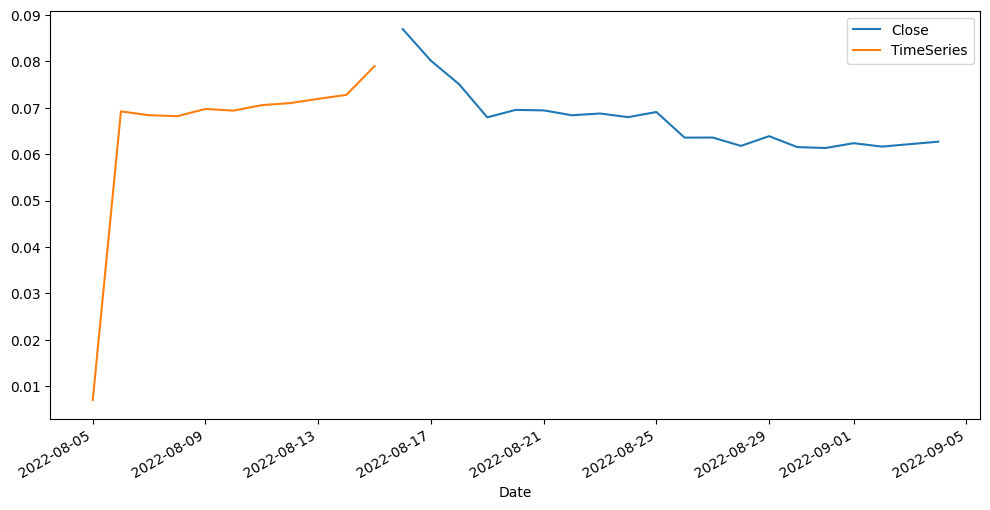

In [104]:

test["Close"].plot(legend=True, figsize=(12, 6))
predictions.plot(label='TimeSeries', legend=True)